In [38]:
import os
import json
import statistics
import matplotlib.pyplot as plt

In [39]:
filenames = [ f for f in os.listdir() if f.split('.')[-1] == 'json' ]
filenames

['result-0.json', 'result-1.json']

In [44]:
statparse = {}
for fname in filenames:
    with open(fname) as f: data = json.loads(f.read())
    duration = int(fname.split('.')[0].split('-')[-1])
    statparse[duration] = {}
    for kind in data.keys():
        dat = data[kind]
        statparse[duration][kind] = {}
        statparse[duration][kind]['avg'] = statistics.mean(dat)
        statparse[duration][kind]['std'] = statistics.stdev(dat)
        statparse[duration][kind]['raw'] = data[kind]

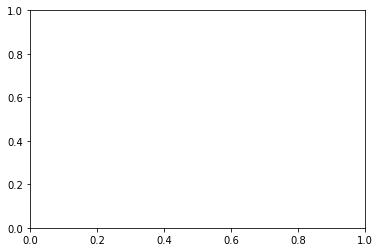

In [60]:
fig,axs = plt.subplots()

for duration in statparse:
    barplot_index = 0
    for kind in statparse[duration]:
        d = statparse[duration][kind]
        p = ax.bar(barplot_index, d['avg'], yerr=d['std'])
        barplot_index += 1
        ax.set_title("timer comparison for "+str(duration)+" msec")
        
        

[0.4061, 1088.0077]

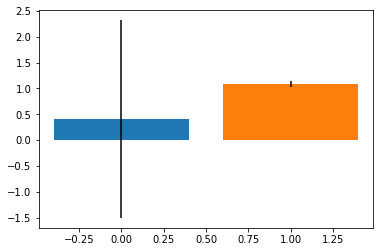

In [57]:
avgs = [ statparse[i]['java']['avg'] for i in (0,1) ]
stds = [ statparse[i]['java']['std'] for i in (0,1) ]
fix, ax = plt.subplots()
p1 = ax.bar(0,avgs[0],yerr=stds[0])
p2 = ax.bar(1,avgs[1]/1000,yerr=stds[1]/1000)
avgs